In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [ ]:
Error_h = np.loadtxt("PoissonError_h.txt")
Error_p = np.loadtxt("PoissonError_p.txt")

h = Error_h[:,0]
err_h = Error_h[:,1]
t_h = Error_h[:,2]

p = Error_p[:,0]
err_p = Error_p[:,1]
t_p = Error_p[:,2]

# Plot h-convergence and timecomplexity
Note h from the data is number of equispaced nodes along one axis, but we whish to plot with the largest element length. In this case this will be the hypotenuse of any element

The domain is $[0,1]\times[0,1]$ which will be devided into $2\cdot(h-1)^2$ elements. Hence the catheti of all elements are of length $\frac{1}{h-1}$

This will yield the hypothenuse length of 

$$
hyp = \frac{1}{\sqrt{2(h-1)^2}} = \frac{1}{\sqrt{2}(h-1)}
$$

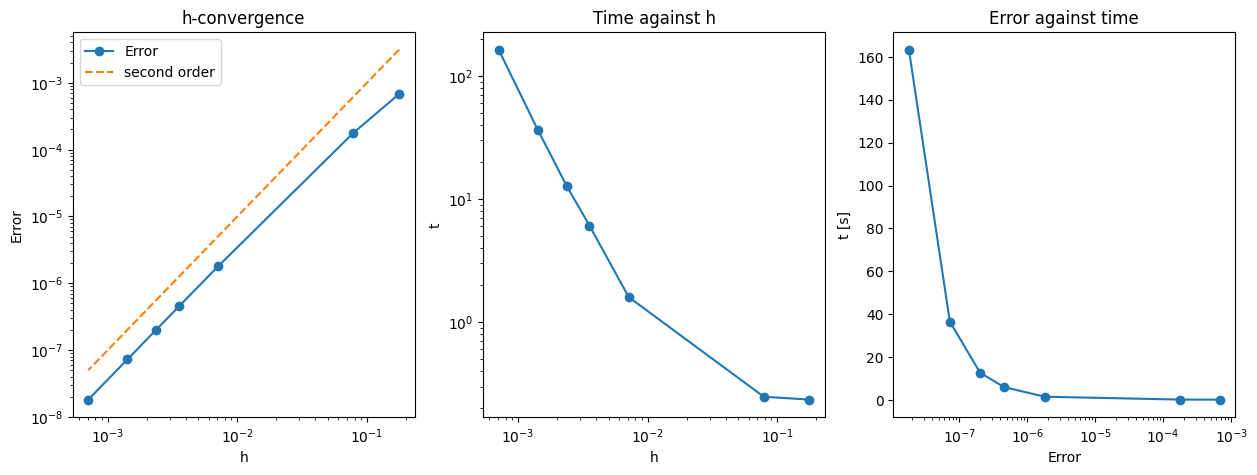

In [57]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

hyp = 1/(np.sqrt(2)*(h-1))

# h-convergence
ax[0].set_title('h-convergence')
ax[0].loglog(hyp, err_h, label='Error', marker='o')
ax[0].loglog(hyp, 10**(-1)*hyp**(2), label='second order', linestyle='--')
ax[0].legend()
ax[0].set_xlabel('h')
ax[0].set_ylabel('Error')


# time against h
ax[1].set_title('Time against h')
ax[1].loglog(hyp, t_h, label='Time', marker='o')
ax[1].set_xlabel('h')
ax[1].set_ylabel('t')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(err_h, t_h, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')


plt.show()


# Plotting p-convergence
The p-convergence was computed on a uniform square mesh on $[0,1]\times[0,1]$ with $5\times 5$ points 

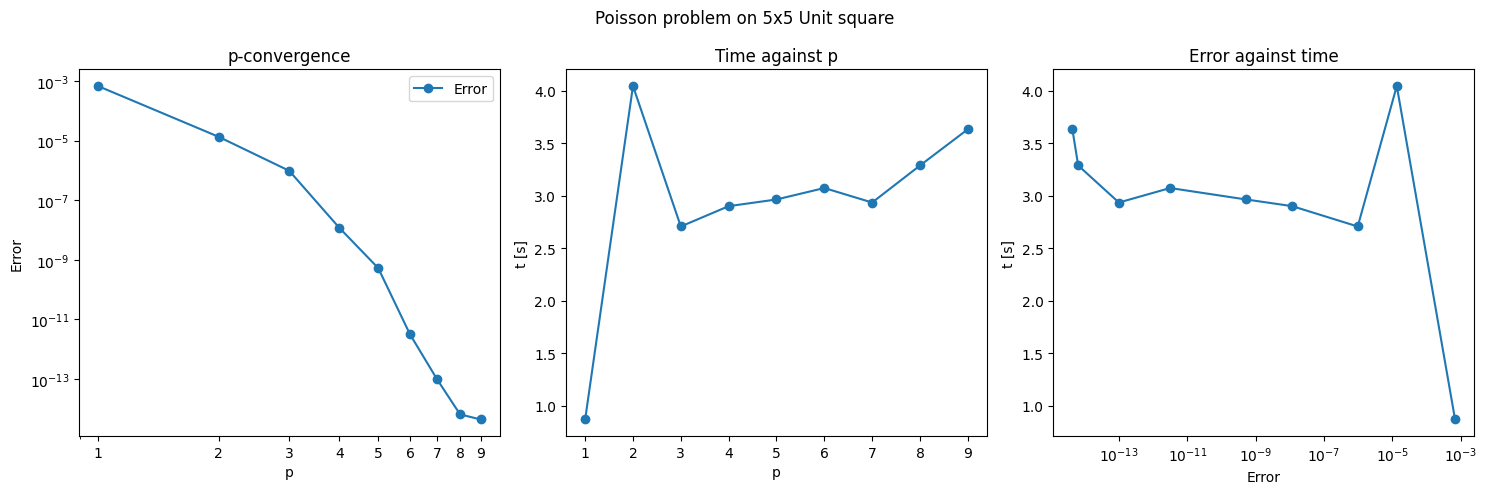

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), layout='tight')

# p-convergence
ax[0].set_title('p-convergence')
ax[0].loglog(p, err_p, label='Error', marker='o')
#ax[0].loglog(p, (1/32)**(p+1), label='P+1 order', linestyle='--')
ax[0].legend()
ax[0].set_xticks(p)
ax[0].set_xticklabels(*np.array([p], dtype=int))
ax[0].set_xlabel('p')
ax[0].set_ylabel('Error')

# time against p
ax[1].set_title('Time against p')
ax[1].plot(p, t_p, label='Time', marker='o')
ax[1].set_xlabel('p')
ax[1].set_ylabel('t [s]')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(err_p, t_p, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')

plt.suptitle('Poisson problem on 5x5 Unit square')
plt.show()

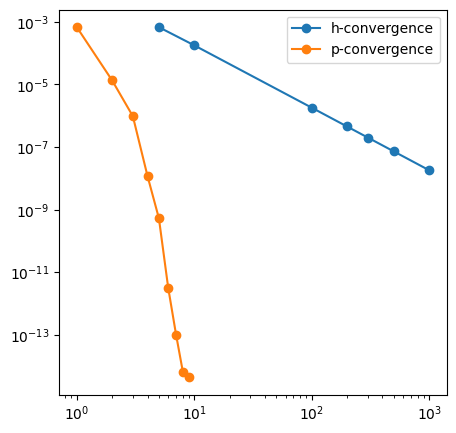

In [75]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.loglog(h, err_h, label = "h-convergence", marker = "o")
ax.loglog(p, err_p, label = "p-convergence", marker = "o")
ax.legend()

plt.show()